## Business Understanding

Kanker paru-paru merupakan salah satu penyebab utama kematian di seluruh dunia. Deteksi dini risiko kanker paru-paru sangat penting untuk mengambil langkah pencegahan, seperti perubahan gaya hidup, pengobatan lebih awal, atau pemantauan secara rutin. Dalam banyak kasus, risiko seseorang terkena kanker paru-paru dapat dipengaruhi oleh berbagai faktor, baik genetik maupun lingkungan. Oleh karena itu, kemampuan untuk memprediksi risiko kanker paru-paru berdasarkan faktor-faktor ini menjadi sangat penting dalam dunia kesehatan.

## Tujuan
Proyek ini bertujuan untuk mengembangkan model prediksi yang dapat membantu mengidentifikasi tingkat risiko seseorang terkena kanker paru-paru berdasarkan serangkaian faktor risiko. Tingkat risiko ini akan dikategorikan menjadi tiga level: low (rendah), medium (sedang), dan high (tinggi).


## Data Understanding

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.express as px


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

# Model Select
from sklearn.model_selection import train_test_split

# Scaling Data
from sklearn import preprocessing

# Import library untuk modeling
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [154]:
df = pd.read_csv('cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [155]:
df.shape

(1000, 26)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [157]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [158]:
q1 = df.select_dtypes(exclude = ['object']).quantile(0.25)
q3 = df.select_dtypes(exclude = ['object']).quantile(0.75)
iqr = q3- q1
iqr

,0
index,499.50
Age,17.25
Gender,1.00
Air Pollution,4.00
Alcohol use,5.00
Dust Allergy,3.00
OccuPational Hazards,4.00
Genetic Risk,5.00
chronic Lung Disease,3.00
Balanced Diet,5.00


In [159]:
outlier_filter = (df.select_dtypes(exclude = ['object']) < q1 - 1.5 * iqr) | (df.select_dtypes(exclude = ['object']) > q3 + 1.5 * iqr)
outlier_filter

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [160]:
for col in outlier_filter.columns:
  print('Nama Kolom: ', col)
  print(outlier_filter[col].value_counts())
  print('-------------')

Nama Kolom:  index
index
False    1000
Name: count, dtype: int64
-------------
Nama Kolom:  Age
Age
False    990
True      10
Name: count, dtype: int64
-------------
Nama Kolom:  Gender
Gender
False    1000
Name: count, dtype: int64
-------------
Nama Kolom:  Air Pollution
Air Pollution
False    1000
Name: count, dtype: int64
-------------
Nama Kolom:  Alcohol use
Alcohol use
False    1000
Name: count, dtype: int64
-------------
Nama Kolom:  Dust Allergy
Dust Allergy
False    1000
Name: count, dtype: int64
-------------
Nama Kolom:  OccuPational Hazards
OccuPational Hazards
False    1000
Name: count, dtype: int64
-------------
Nama Kolom:  Genetic Risk
Genetic Risk
False    1000
Name: count, dtype: int64
-------------
Nama Kolom:  chronic Lung Disease
chronic Lung Disease
False    1000
Name: count, dtype: int64
-------------
Nama Kolom:  Balanced Diet
Balanced Diet
False    1000
Name: count, dtype: int64
-------------
Nama Kolom:  Obesity
Obesity
False    1000
Name: count, dtype: int64

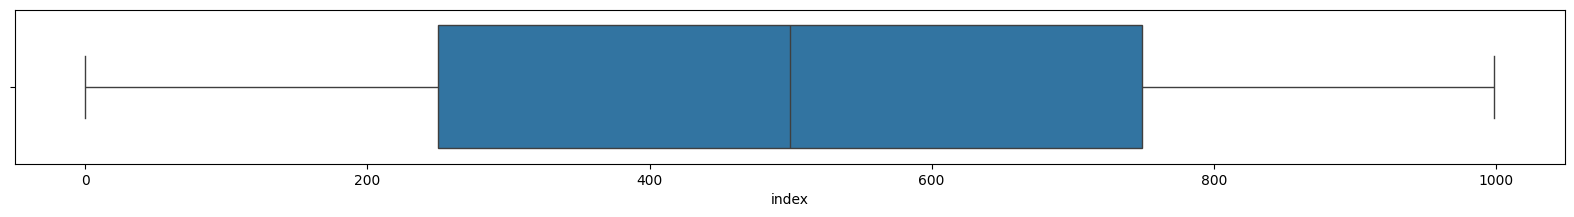

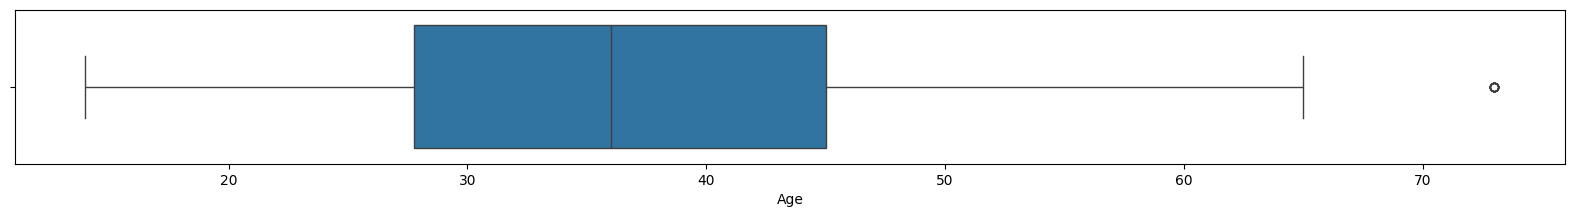

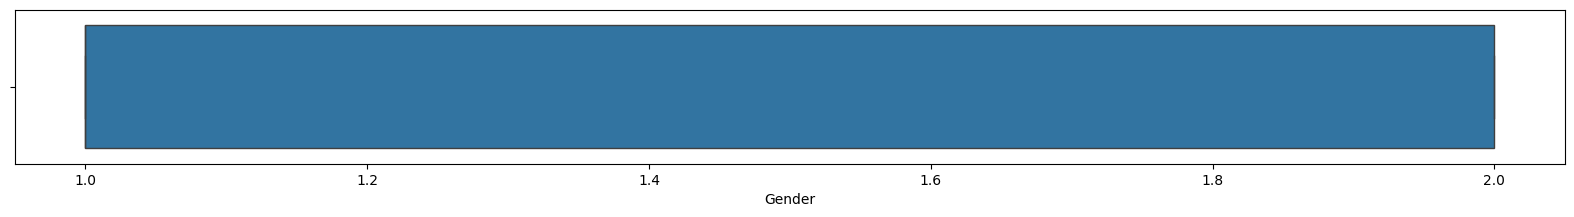

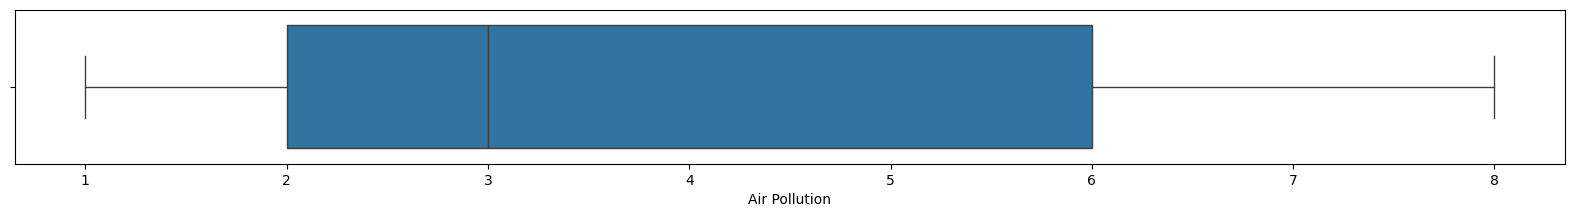

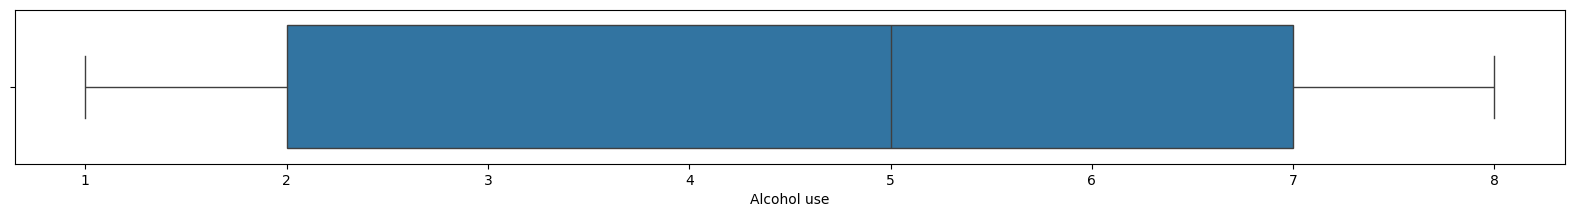

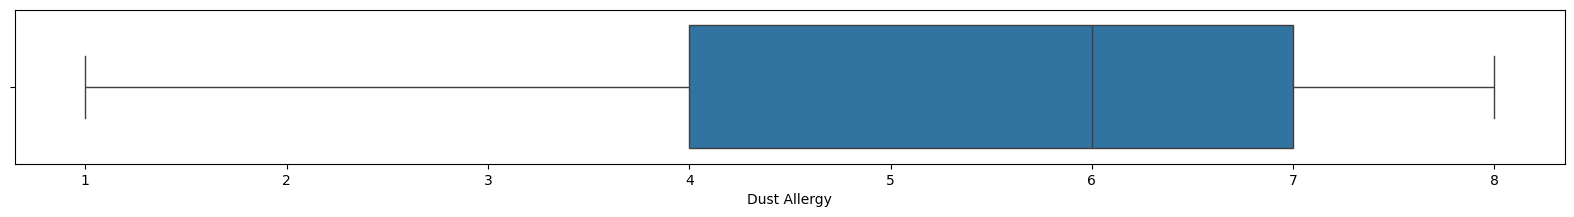

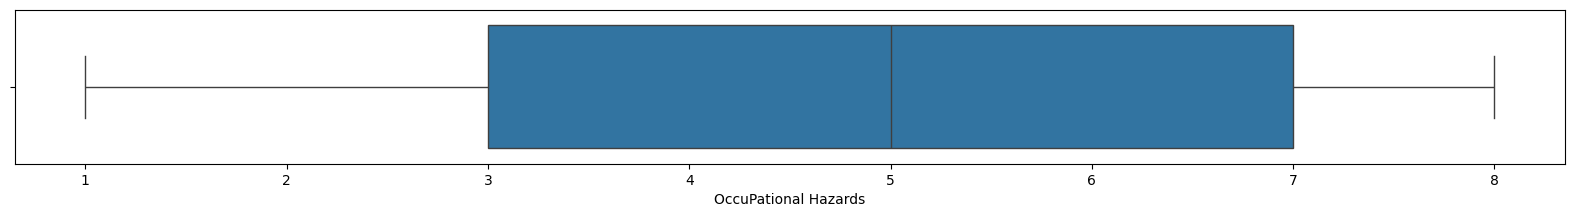

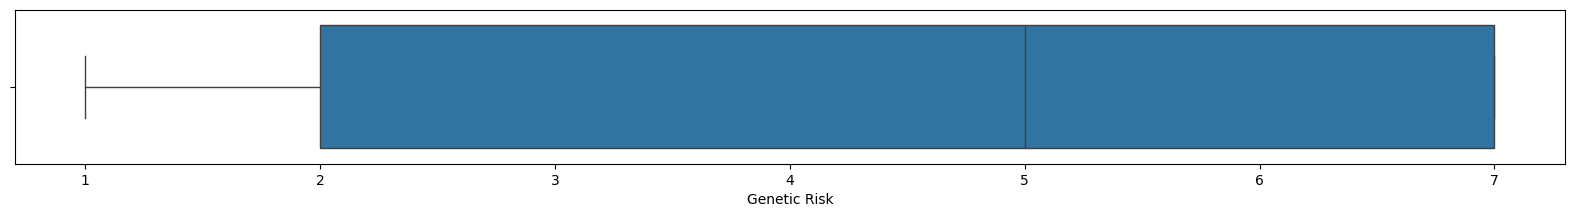

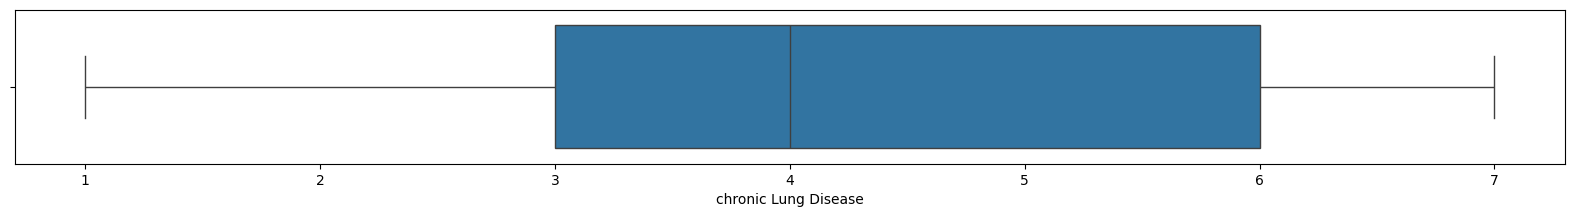

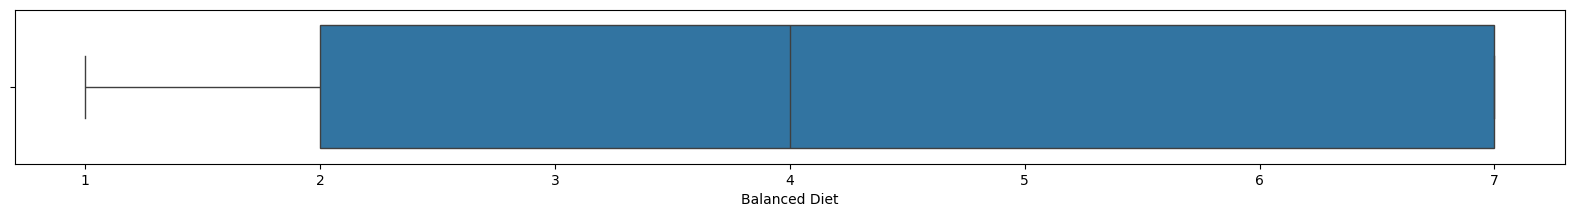

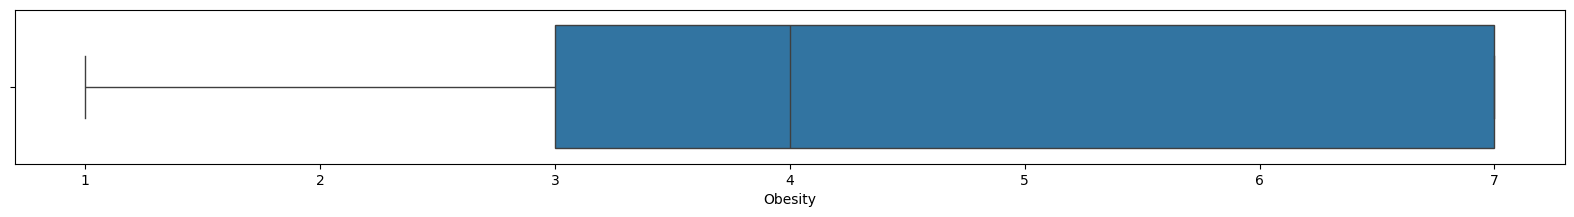

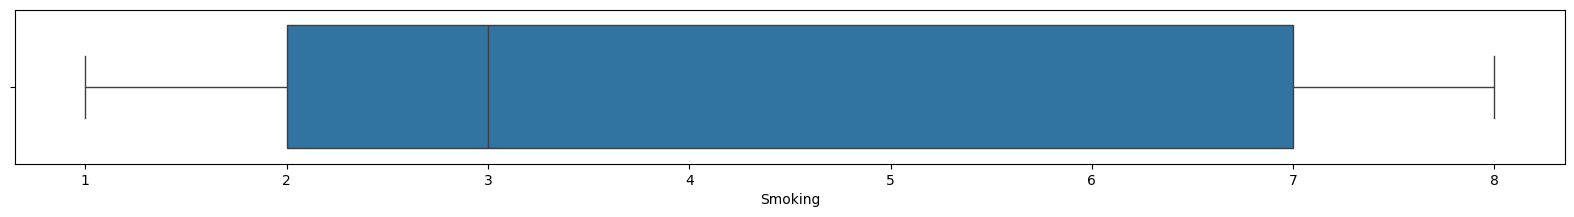

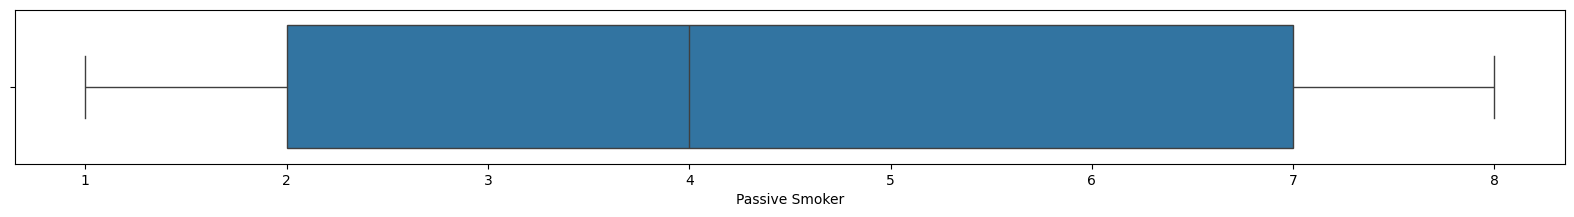

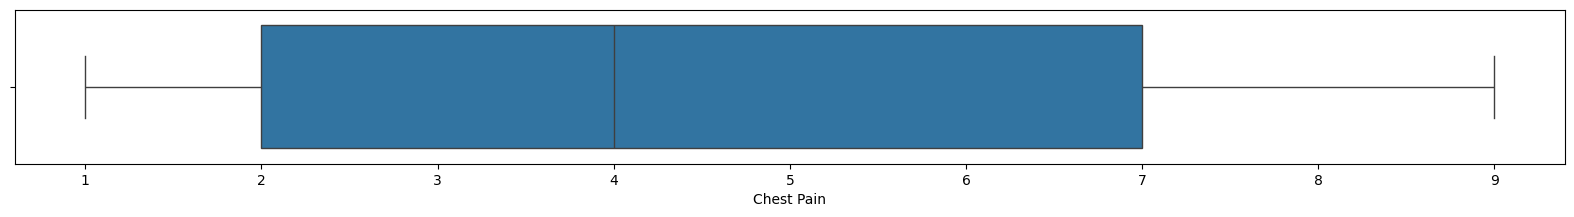

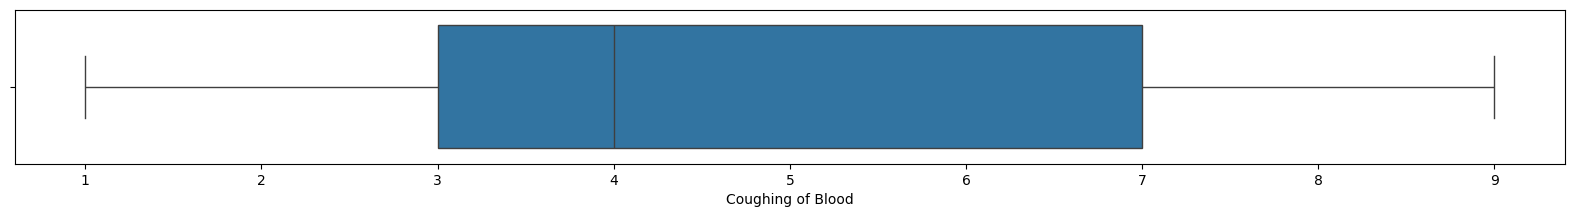

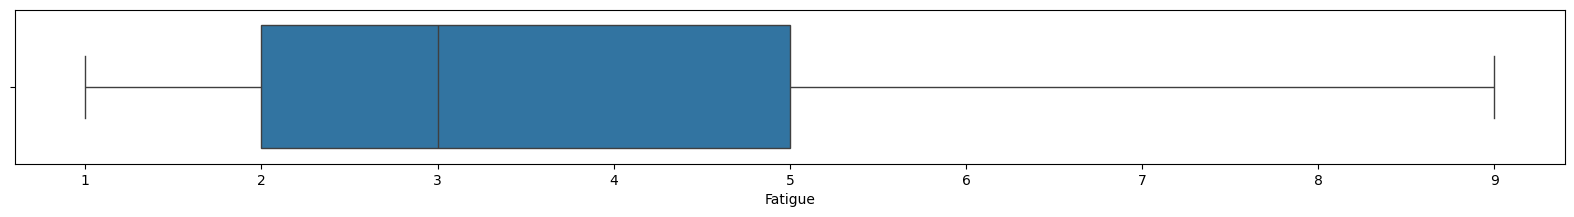

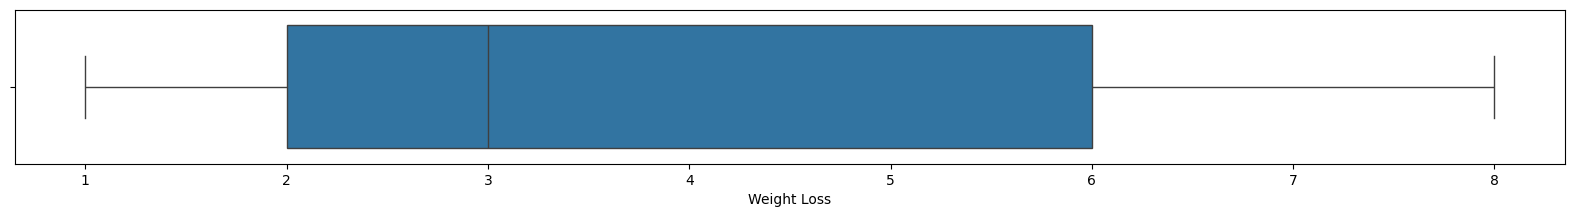

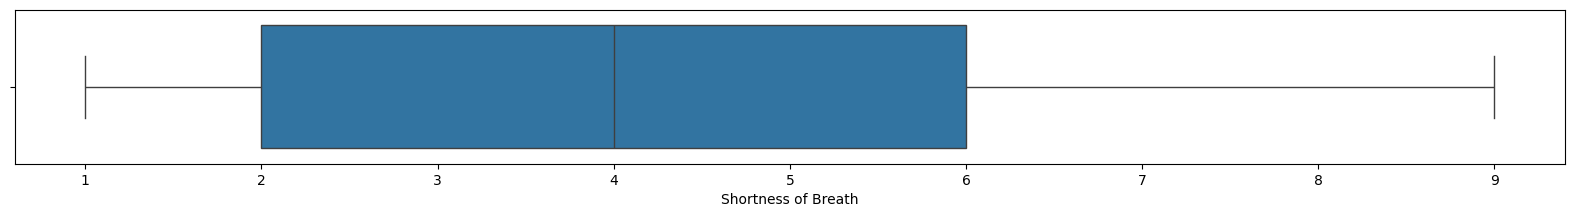

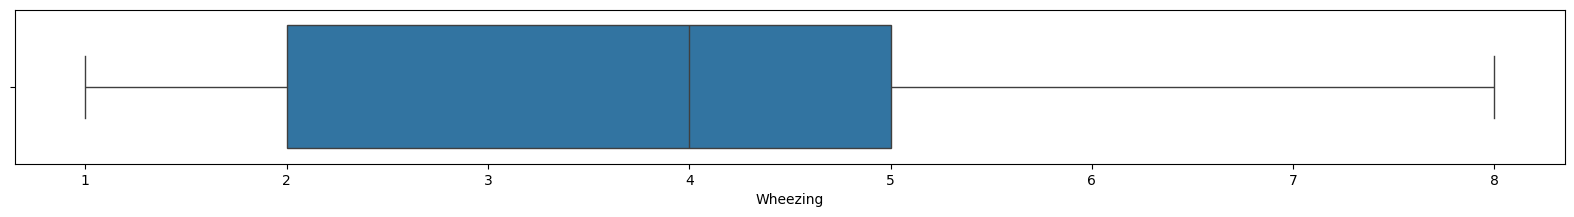

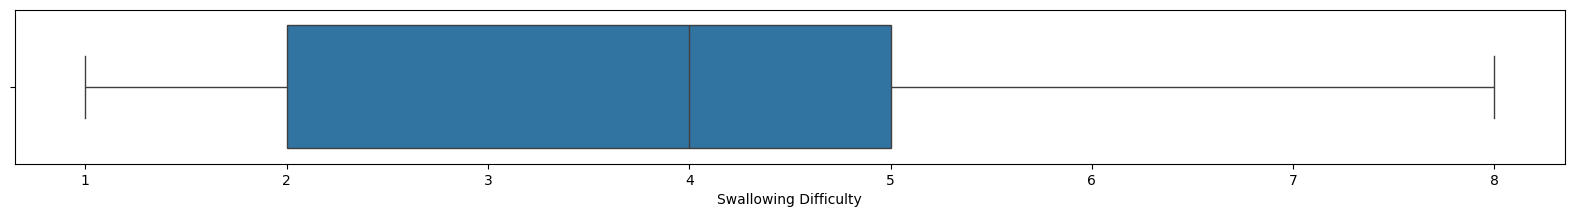

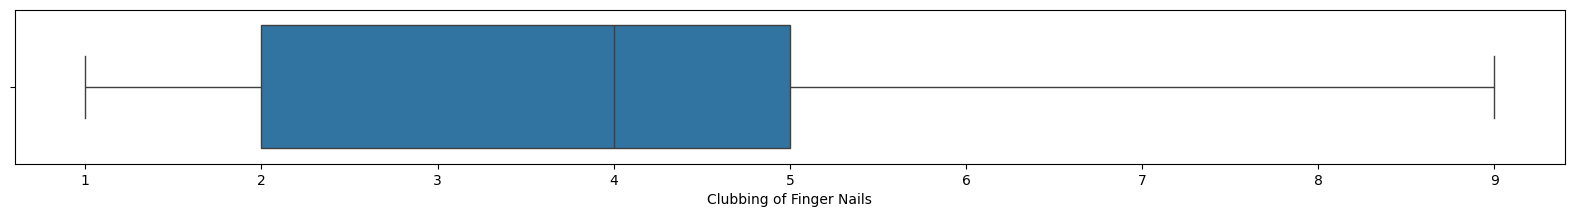

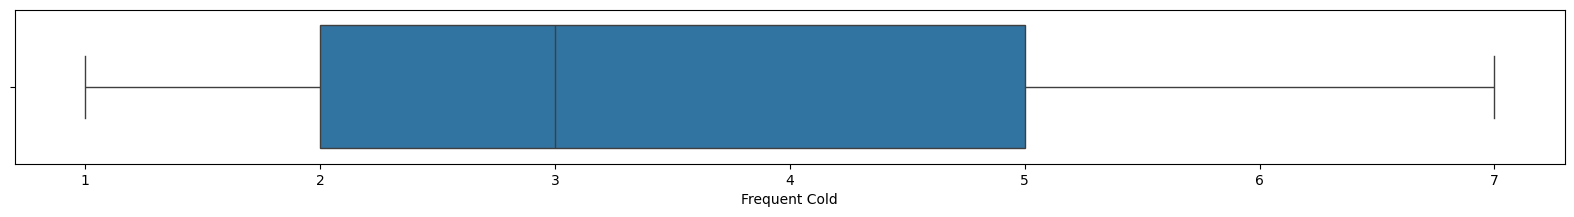

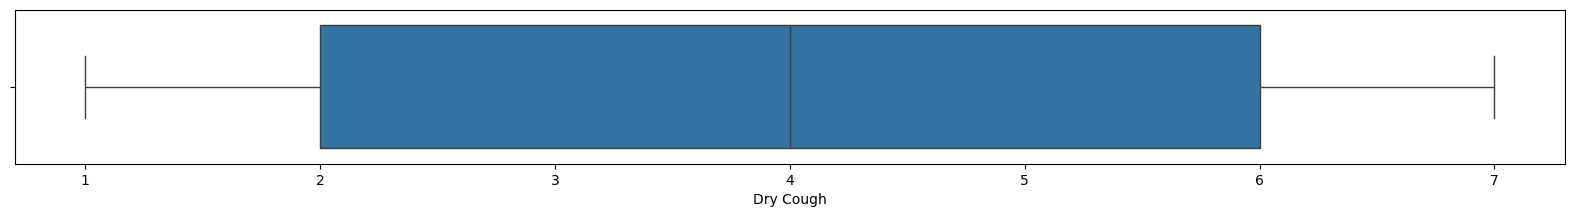

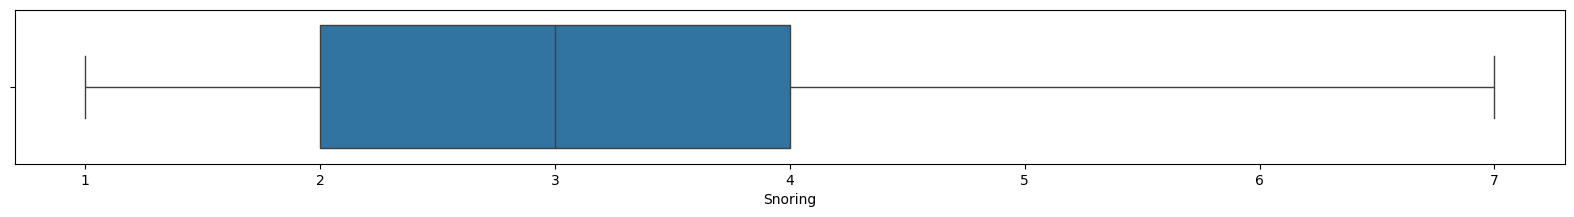

In [161]:
df_outlier = df.select_dtypes(exclude = ['object'])
for column in df_outlier.columns:
  plt.figure(figsize = (20,2))
  sns.boxplot(df_outlier, x = column)

<Axes: xlabel='Age'>

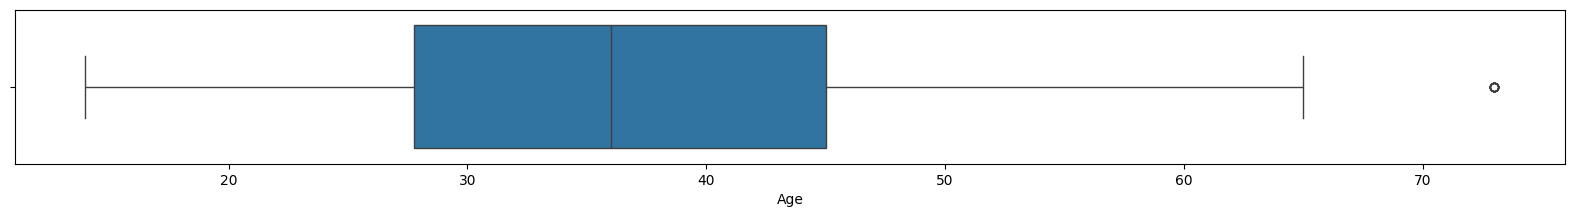

In [162]:
plt.figure(figsize = (20,2))
sns.boxplot(df, x = 'Age')

<Axes: xlabel='Age', ylabel='count'>

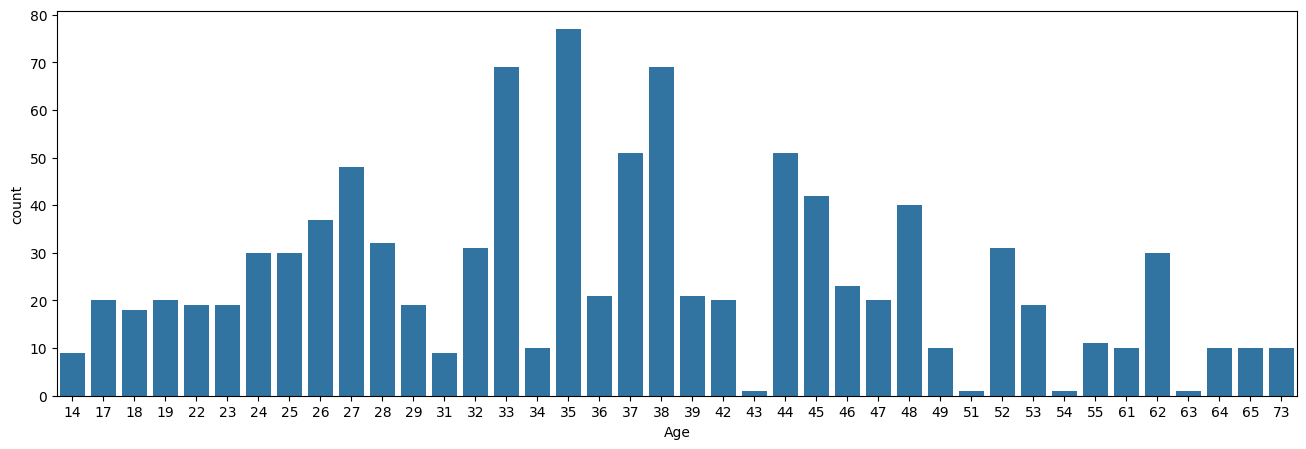

In [163]:
plt.figure(figsize = (16,5))
sns.countplot(x='Age', data = df)

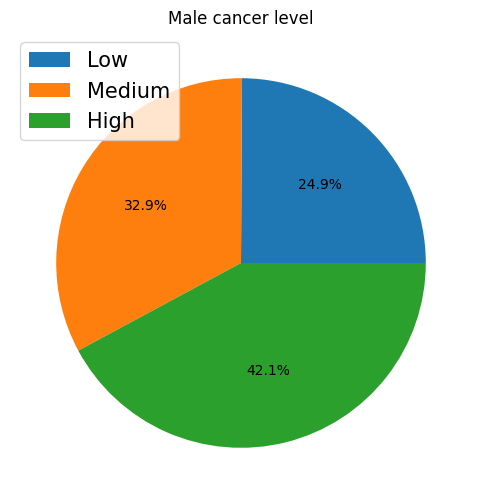

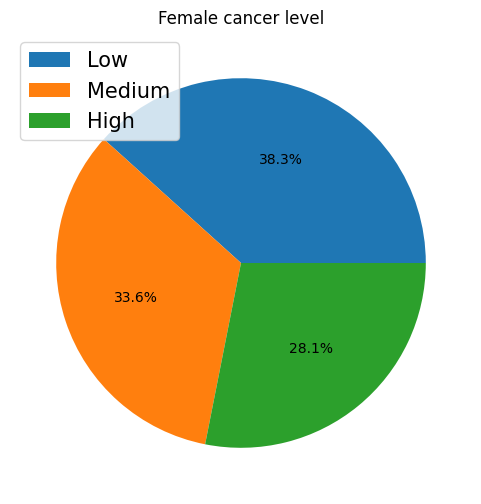

In [164]:
Male = []
Female = []
label = df['Level'].unique()

for j in label:
  Male.append(df[(df['Level'] == j) & (df['Gender'] == 1)]['Level'].count())
  Female.append(df[(df['Level'] == j) & (df['Gender'] == 2)]['Level'].count())

plt.figure(figsize=(7,6))
plt.pie(x=Male, autopct='%1.1f%%')
plt.title('Male cancer level')
plt.legend(label, loc="upper left", fontsize=15)
plt.show()

plt.figure(figsize=(7,6))
plt.pie(x=Female, autopct='%1.1f%%')
plt.title('Female cancer level')
plt.legend(label, loc="upper left", fontsize=15)
plt.show()


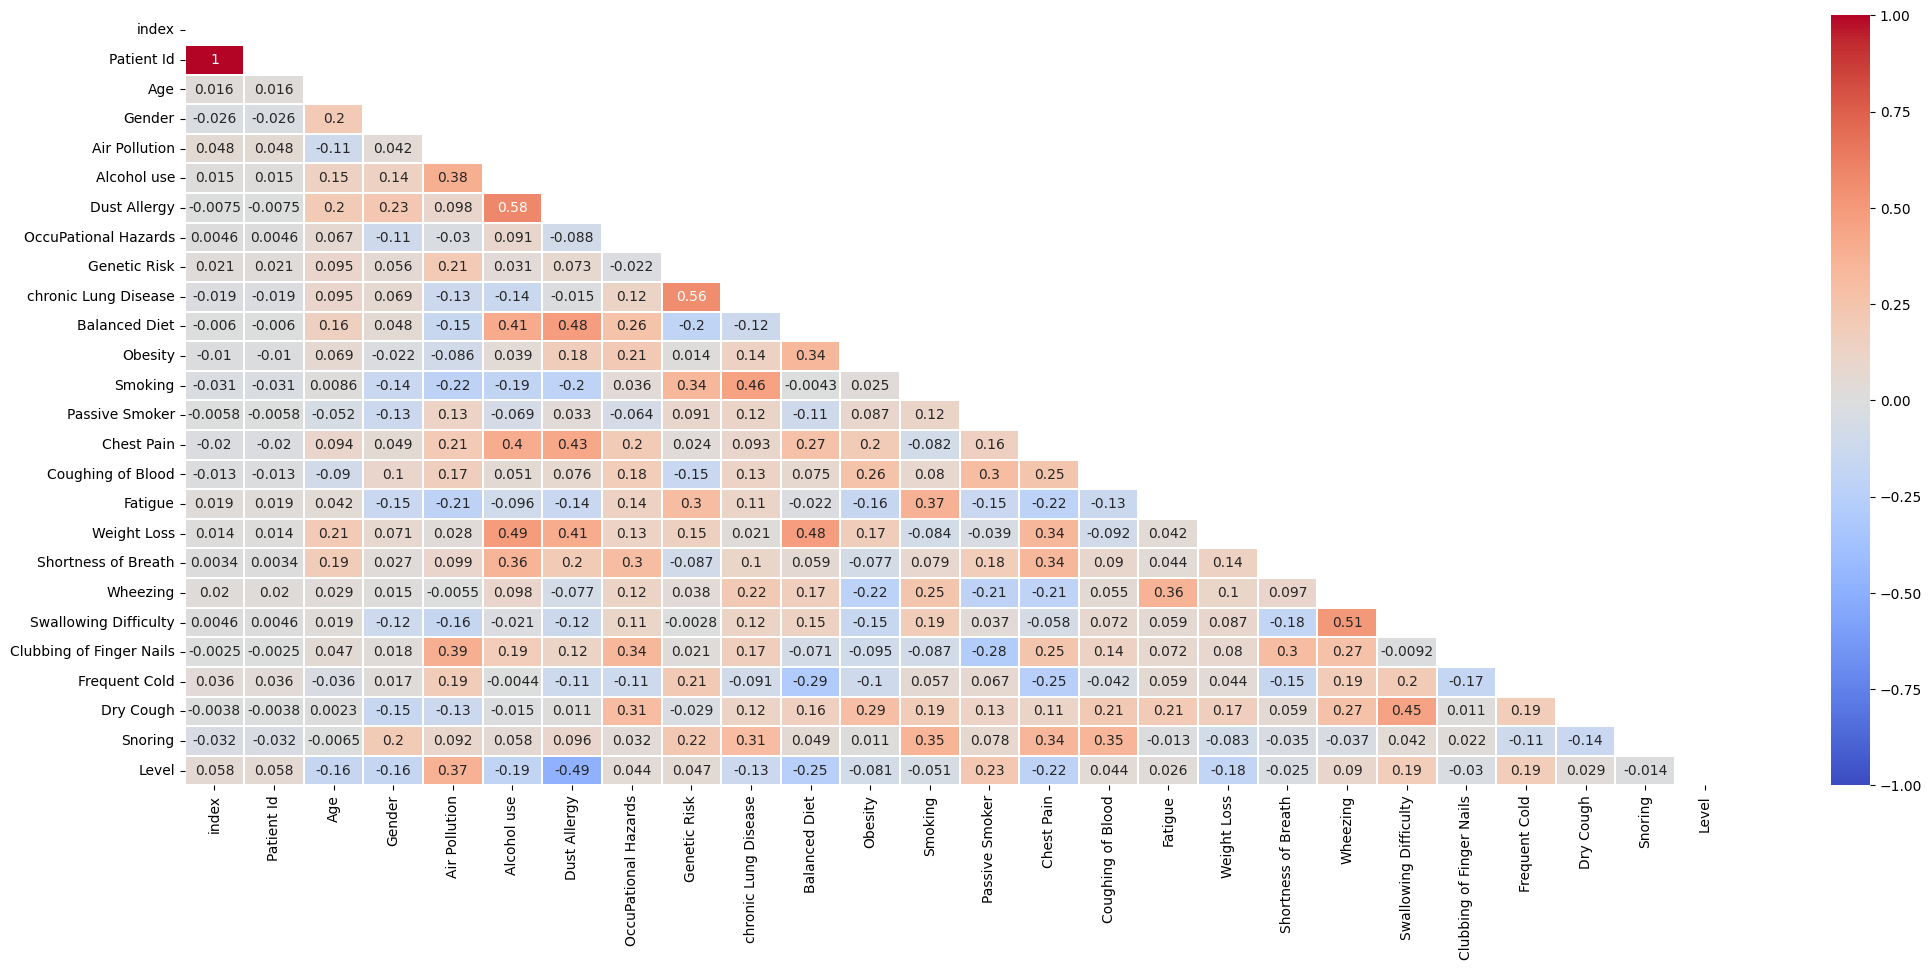

In [165]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## Data Preparation

In [166]:
df = pd.read_csv('cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [167]:
df.shape

(1000, 26)

In [168]:
df = df.iloc[:,2:]
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [169]:
df.isna().sum()

,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0
Balanced Diet,0
Obesity,0


In [170]:
q1 = df.select_dtypes(exclude = ['object']).quantile(0.25)
q3 = df.select_dtypes(exclude = ['object']).quantile(0.75)
iqr = q3 -q1
iqr

,0
Age,17.25
Gender,1.00
Air Pollution,4.00
Alcohol use,5.00
Dust Allergy,3.00
OccuPational Hazards,4.00
Genetic Risk,5.00
chronic Lung Disease,3.00
Balanced Diet,5.00
Obesity,4.00


In [171]:
df_trimming = df[((df.select_dtypes(exclude = ['object']) >= (q1 - 1.5 * iqr)) & (df.select_dtypes(exclude = ['object']) <= (q3 + 1.5 * iqr))).all(axis=1)]
df_trimming.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [172]:
df.shape

(1000, 24)

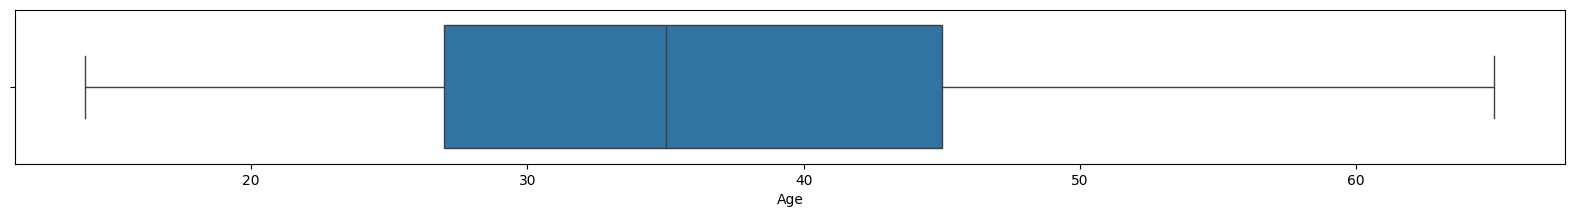

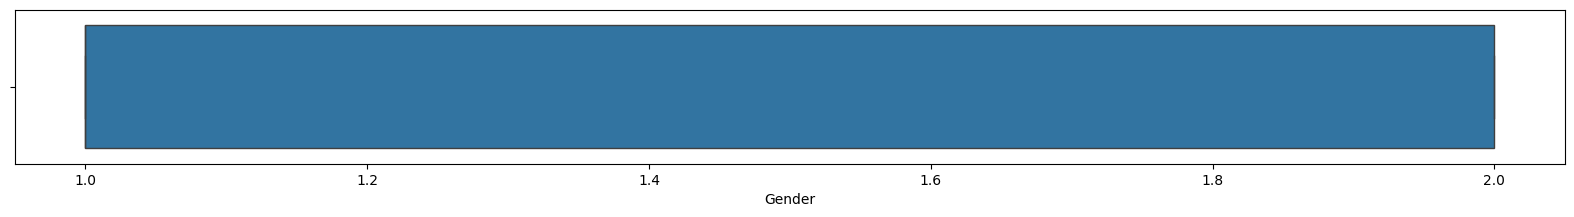

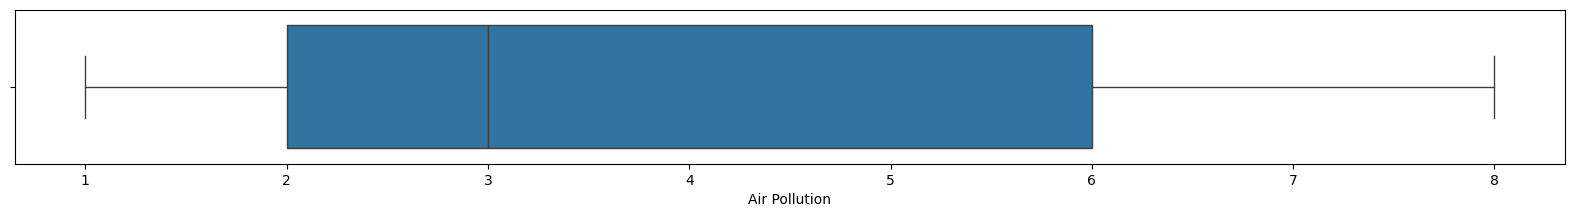

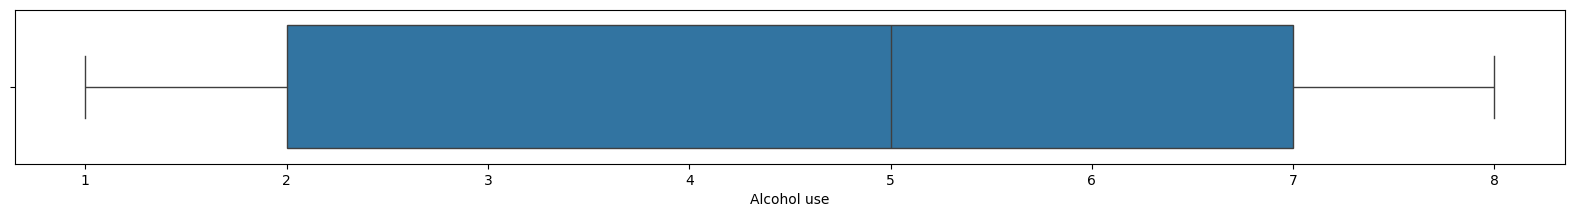

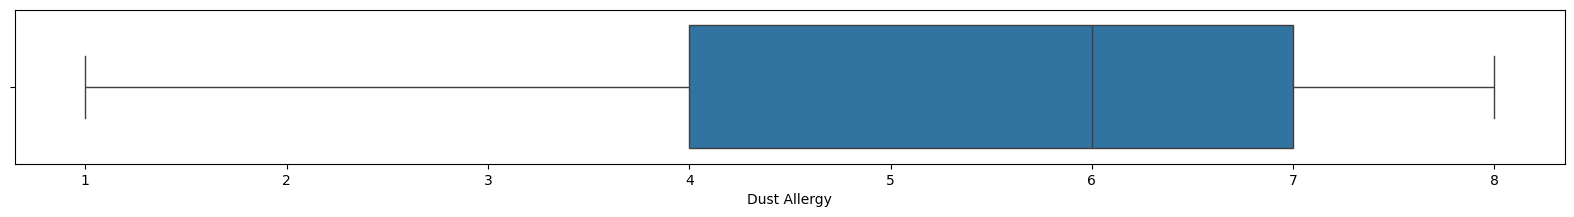

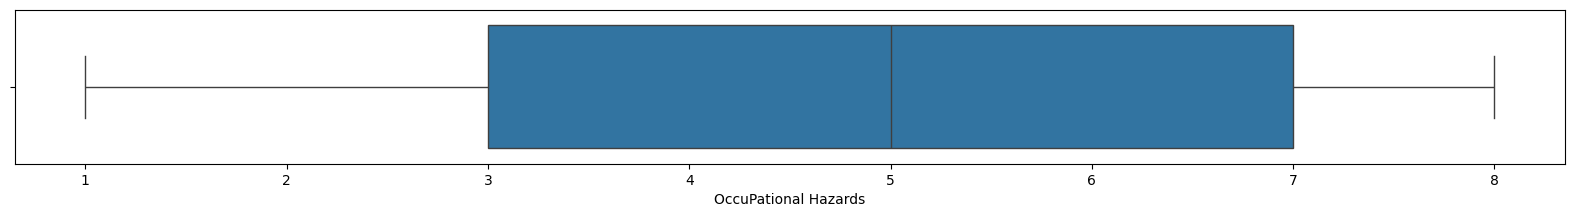

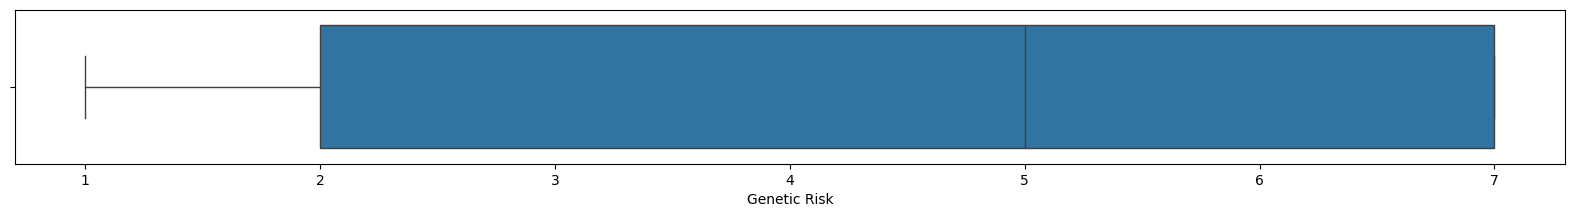

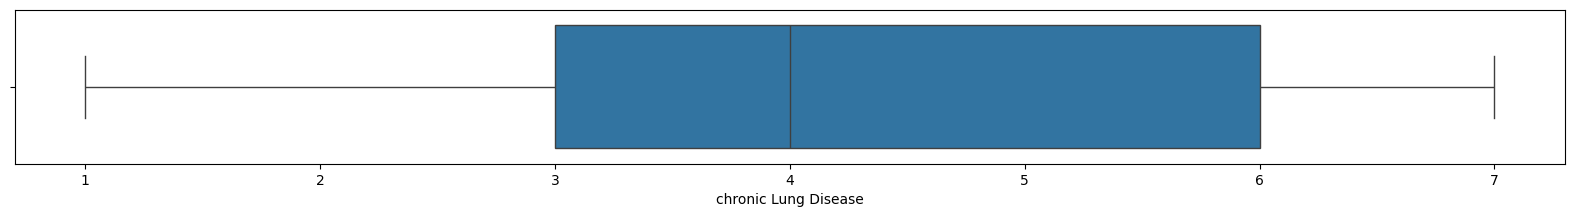

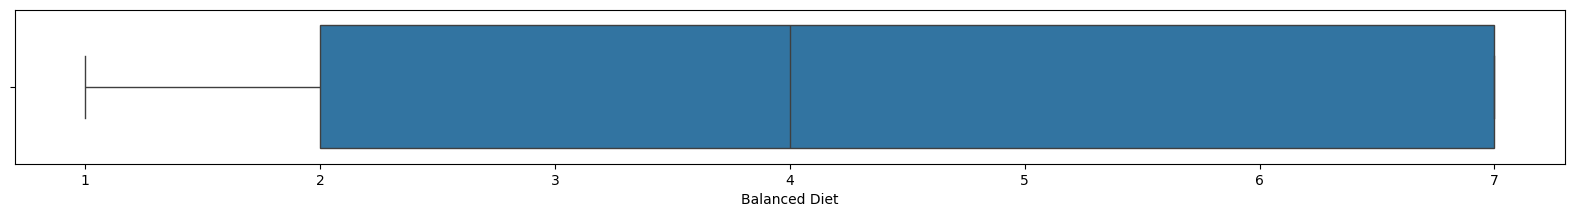

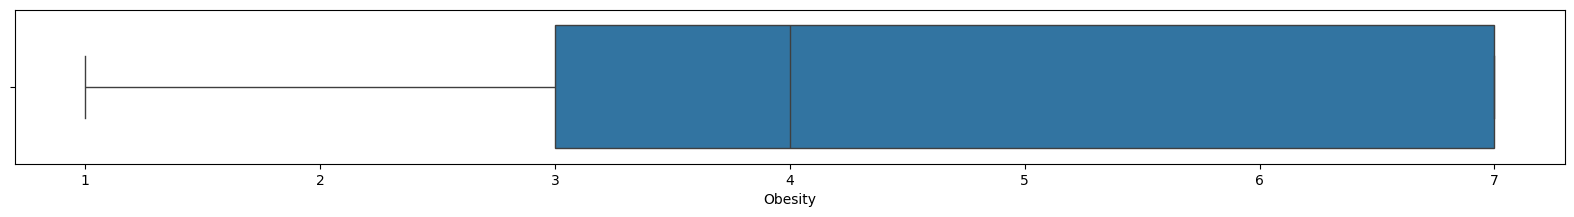

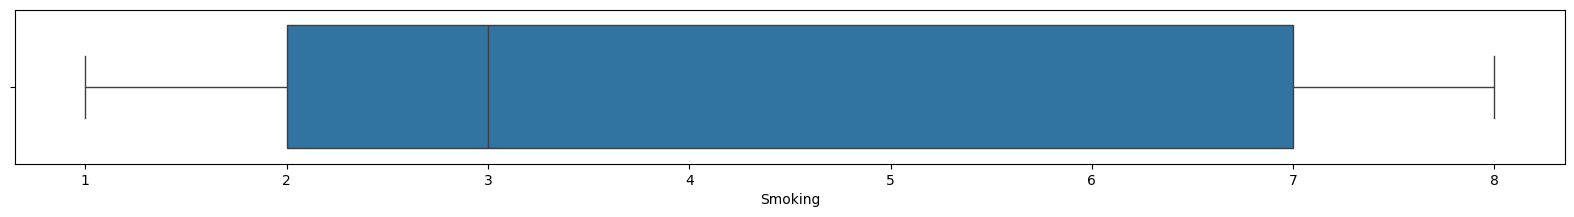

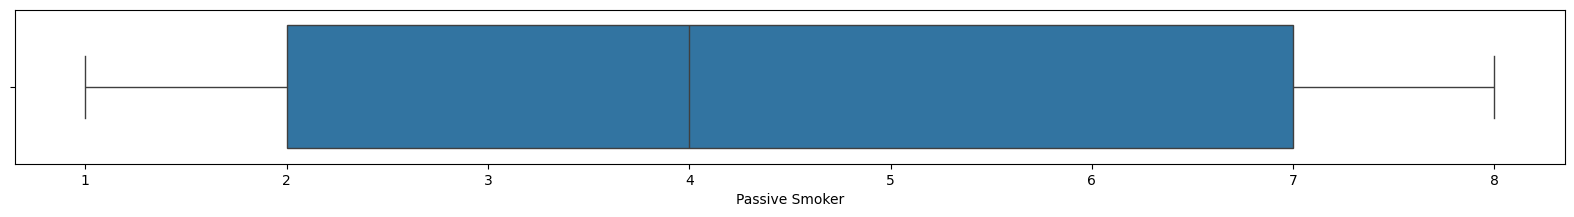

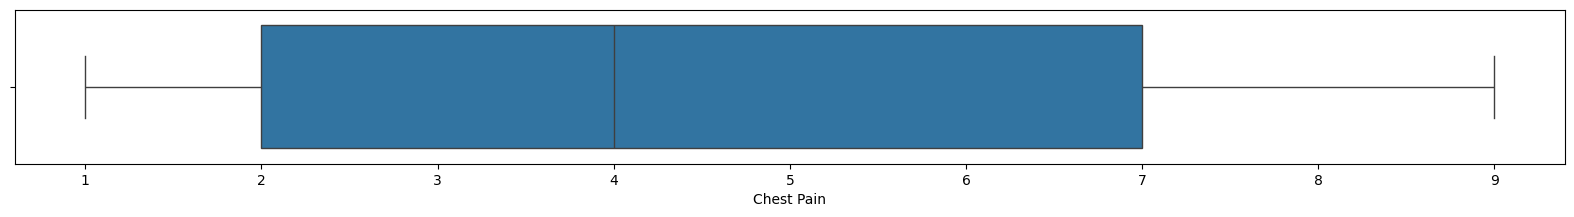

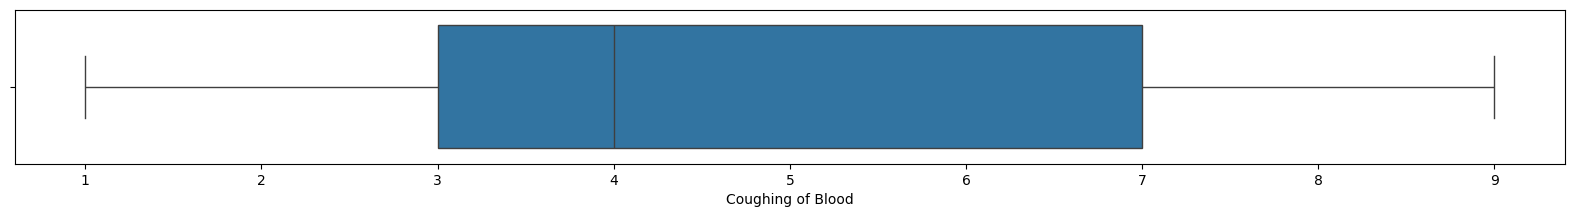

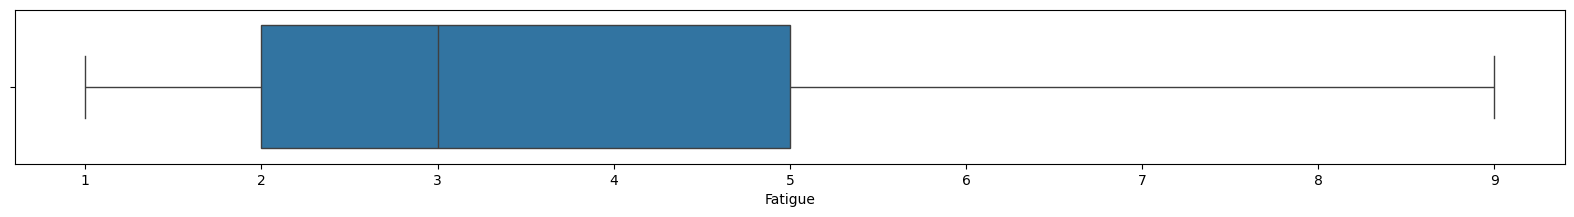

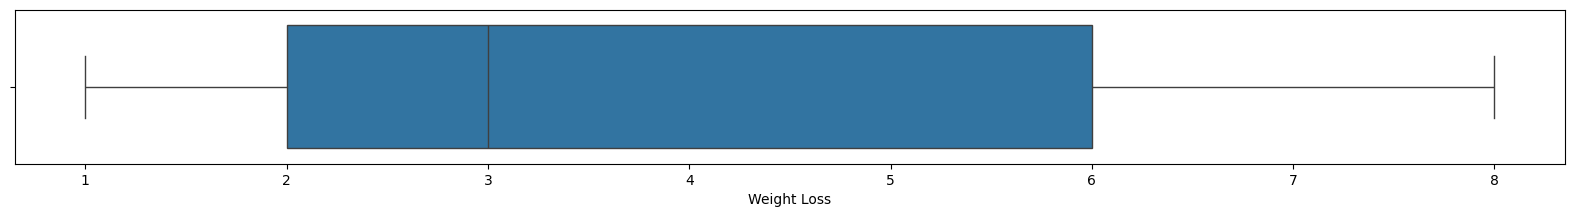

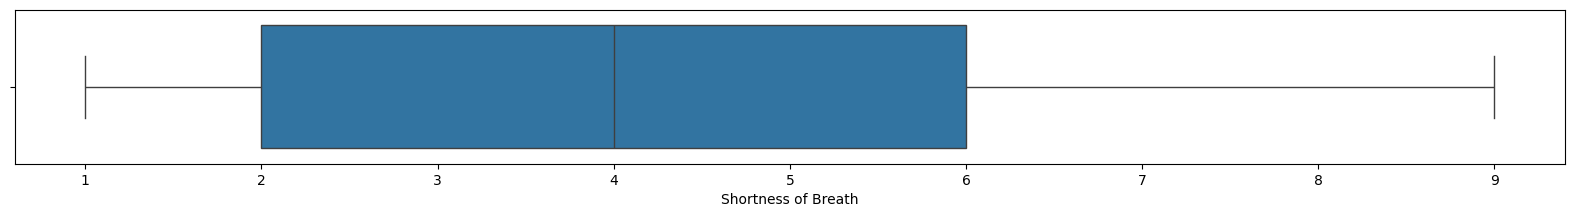

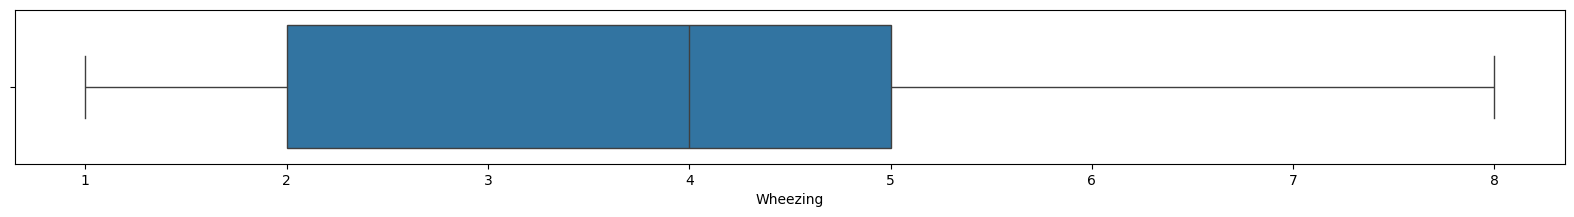

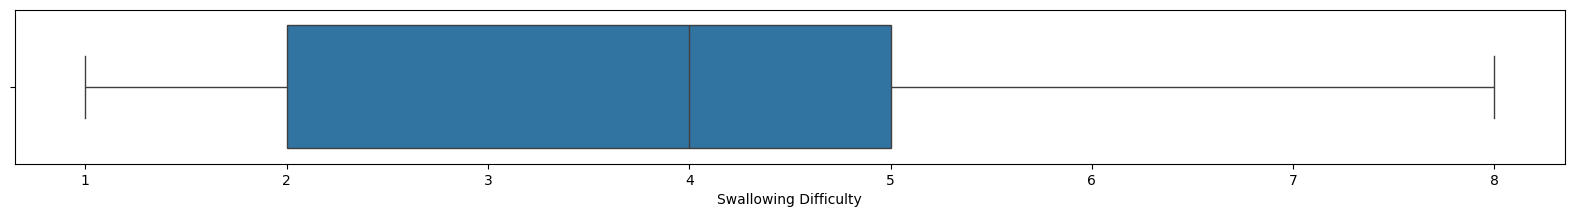

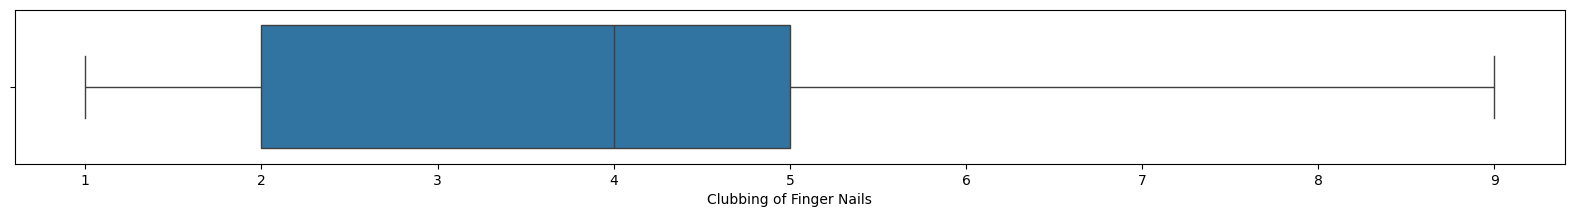

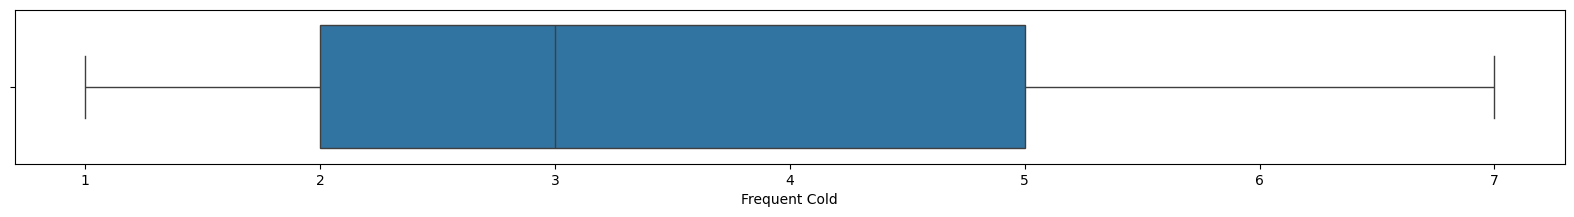

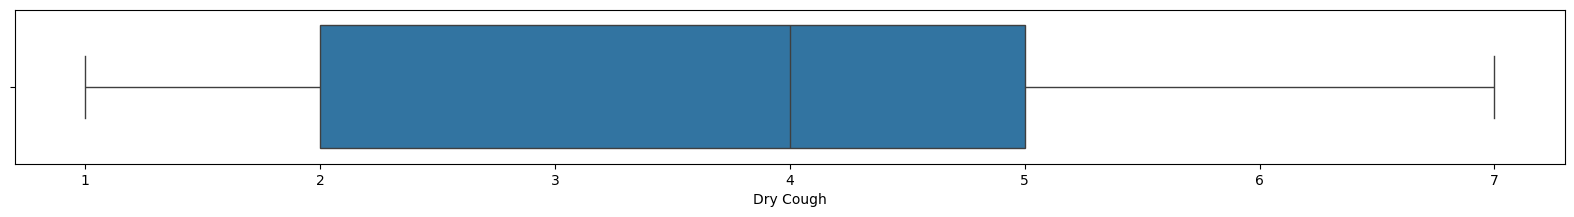

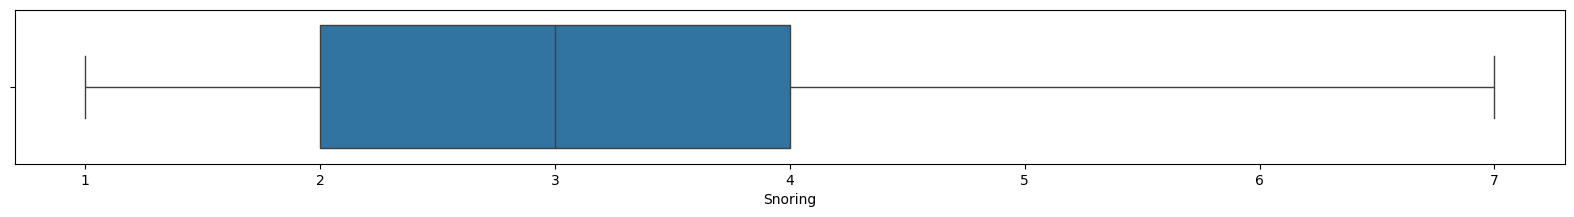

In [173]:
for column in df_trimming.select_dtypes(exclude = ['object']).columns:
  plt.figure(figsize=(20,2))
  sns.boxplot(df_trimming, x = column)

In [174]:
df_winsorize = df.copy()
df_winsorize['Age'] = winsorize(df['Age'], limits=[0, 0.05])

In [175]:
df_winsorize.shape

(1000, 24)

In [176]:
df_trimming.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,36.812121,1.406061,3.828283,4.548485,5.156566,4.838384,4.565657,4.373737,4.475758,4.459596,...,4.857576,3.854545,3.863636,4.222222,3.794949,3.773737,3.942424,3.561616,3.831313,2.935354
std,11.510010,0.491344,2.037269,2.629684,1.989033,2.118373,2.132903,1.856782,2.140872,2.134952,...,2.440167,2.255889,2.215989,2.289712,2.044345,2.264894,2.392210,1.823823,2.037770,1.479165
min,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,1.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,35.000000,1.000000,3.000000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
max,65.000000,2.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [177]:
df_winsorize.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.013000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,11.608686,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,62.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [178]:
df_winsorize.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [179]:
kolom = ['Obesity', 'Smoking', 'Passive Smoker', 'Air Pollution', 'OccuPational Hazards', 'Genetic Risk', 'Coughing of Blood', 'Shortness of Breath', 'Chest Pain', 'Weight Loss', 'Clubbing of Finger Nails']
for col in df_winsorize[kolom].columns:
  print(sorted(df_winsorize[col].unique()))

[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [180]:
le = LabelEncoder()
df_winsorize[kolom] = df_winsorize[kolom].apply(le.fit_transform)

In [181]:
df_winsorize['Level'] = df_winsorize['Level'].apply(lambda x: ['Low', 'Medium', 'High'].index(x))

In [182]:
df_winsorize.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,1,4,5,3,2,2,2,3,...,3,3,1,2,3,0,2,3,4,0
1,17,1,2,1,5,2,3,2,2,1,...,1,2,6,8,6,1,1,7,2,1
2,35,1,3,5,6,4,4,4,6,6,...,8,6,7,2,1,3,6,7,2,2
3,37,1,6,7,7,6,5,7,7,6,...,4,1,2,1,4,4,6,7,5,2
4,46,1,5,8,7,6,6,6,7,6,...,3,1,3,1,4,1,4,2,3,2


In [183]:
kolom_baru = ['Age', 'Obesity', 'Smoking', 'Passive Smoker', 'Air Pollution', 'OccuPational Hazards', 'Genetic Risk', 'Coughing of Blood', 'Shortness of Breath', 'Chest Pain', 'Weight Loss', 'Clubbing of Finger Nails', 'Level']
new_df = df_winsorize[kolom_baru].copy()
new_df.head()

,Age,Obesity,Smoking,Passive Smoker,Air Pollution,OccuPational Hazards,Genetic Risk,Coughing of Blood,Shortness of Breath,Chest Pain,Weight Loss,Clubbing of Finger Nails,Level
0,33,3,2,1,1,3,2,3,1,1,3,0,0
1,17,1,1,3,2,2,3,2,6,1,2,1,1
2,35,6,1,2,3,4,4,7,7,3,6,3,2
3,37,6,6,6,6,6,5,7,2,6,1,4,2
4,46,6,7,6,5,6,6,8,3,6,1,1,2


In [184]:
X = new_df.iloc[:,:-1]
y = new_df['Level']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print('Jumlah X_train: ', len(X_train))
print('Jumlah y_train: ', len(y_train))
print('Jumlah X_test: ', len(X_test))
print('Jumlah y_test: ', len(y_test))

Jumlah X_train:  800
Jumlah y_train:  800
Jumlah X_test:  200
Jumlah y_test:  200


## Modeling

In [186]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

## Evaluation

In [187]:
print(classification_report(y_test, gb_pred))
print(f'MSE: {gb_mse}')
print(f'R-squared: {gb_r2}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        69

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

MSE: 0.0
R-squared: 1.0


## Deployment

In [188]:
import joblib

In [189]:
joblib.dump(gb_model, 'cancer_model.pkl')

['cancer_model.pkl']

In [190]:
#main.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib as joblib

model = joblib.load('cancer_model.pkl')

st.title('Lung Cancer Risk Prediction')
st.markdown('- Python libraries: numpy, pandas, streamlit, matplotlib, seaborn')
st.markdown('- Data source: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link')

df = pd.read_csv('cancer patient data sets.csv')

tab1, tab2 = st.tabs(["Dataset Table", "Prediction"])

with tab1:
    st.write('Lung cancer is the leading cause of cancer death worldwide, accounting for 1.59 million deaths in 2018. The majority of lung cancer cases are attributed to smoking, but exposure to air pollution is also a risk factor. A new study has found that air pollution may be linked to an increased risk of lung cancer, even in nonsmokers.\n\nThe study, which was published in the journal Nature Medicine, looked at data from over 462,000 people in China who were followed for an average of six years. The participants were divided into two groups: those who lived in areas with high levels of air pollution and those who lived in areas with low levels of air pollution.\n\nThe researchers found that the people in the high-pollution group were more likely to develop lung cancer than those in the low-pollution group. They also found that the risk was higher in nonsmokers than smokers, and that the risk increased with age.\n\nWhile this study does not prove that air pollution causes lung cancer, it does suggest that there may be a link between the two. More research is needed to confirm these findings and to determine what effect different types and levels of air pollution may have on lung cancer risk')

    st.table(data=df[:10])

    st.subheader('Total of Lung Cancer Patients Based on Age')
    fig, ax = plt.subplots(figsize=(25,7))
    sns.countplot(x="Age", data=df)
    st.pyplot(fig)

    st.subheader('Total of Lung Cancer Patients Based on Gender')
    Male = []
    Female = []
    label = df['Level'].unique()

    for j in label:
        Male.append(df[(df['Level'] == j) & (df['Gender'] == 1)]['Level'].count())
        Female.append(df[(df['Level'] == j) & (df['Gender'] == 2)]['Level'].count())

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    ax[0].pie(x=Male, autopct='%1.1f%%')
    ax[0].set_title('Male cancer level')
    ax[1].pie(x=Female, autopct='%1.1f%%')
    ax[1].set_title('Female cancer level')
    ax[0].legend(label,loc="upper left",fontsize=15)
    st.pyplot(fig)

    st.subheader('Heatmap for all columns')
    fig, ax = plt.subplots(figsize=(25, 10))
    corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
    st.pyplot(fig)

with tab2:
    col1, col2 = st.columns(2)
    with col1:
        age = st.number_input(label = "Age",
                                 min_value=14,
                                 max_value=90,
                                 step=1,
                                 placeholder="Place your age...")

        height = st.number_input(label = "Height",
                                 min_value=100.0,
                                 max_value=250.0,
                                 step=0.1,
                                 placeholder="Place your height...")

        weight = st.number_input(label = "Weight",
                                 min_value=30.0,
                                 max_value=300.0,
                                 step=0.1,
                                 placeholder="Place your Weight...")

        smoking = st.selectbox("Amount of cigarettes",
                               ("Not smoking","less than 1 per week", "1-2 per week", "1-5 per day", "6-10 per day", "11-20 per day", "21-30 per day", "more than 30 per day"),
                                key=(1))

        passive_smoking = st.selectbox("Amount of passive smoke exposure you experience",
                              ("No Exposure", "Rare Exposure", "Occasional Exposure", "Low Exposure", "Moderate Exposure", "High Exposure", "Very High Exposure", "Extreme Exposure"),
                              key=(2))

        air_pollution = st.selectbox("Where do you live",
                               ("Rural, little industrial or vehicular activity", "Suburban, little industrial activity", "Small town, some pollution", "Urban, vehicular and some industries", "Large city, significant vehicles and some industries", "Large city, high vehicles and many industries", "Industrial, many factories and heavy vehicles", "Heavy pollution from various sources"),
                                key=(3))

        occupation = st.selectbox("Occupation",
                               ("Office Worker", "Retail Worker", "Teacher/Professor", "Public Transport Worker", "Doctor/Healthcare Worker", "Construction Worker", "Manufacturing Industry Worker", "Mining Worker"),
                                key=(4))

    with col2:
        genetic_risk = st.selectbox("Genetic risk in your family",
                               ("No family history", "Lung cancer in distant relatives", "Lung cancer in one close relative", "Lung cancer in one middle-aged close relative", "Lung cancer in multiple close relatives or one young close relative", "Lung cancer in several middle-aged close relatives or multiple young close relatives", "Lung cancer in many close relatives, including young ones"),
                                key=(5))

        coughing_of_blood = st.selectbox("Coughing of Blood",
                                          ["None",
                                           "Very mild or rare",
                                           "Mild, few times/month",
                                           "Moderate, few times/week",
                                           "Frequent, may need attention",
                                           "Frequent, may indicate serious issue",
                                           "Severe, needs immediate attention",
                                           "Very severe, critical condition",
                                           "Life-threatening"],
                                          key=6)

        shortness_of_breath= st.selectbox("Shortness of Breath",
                                            ["None",
                                             "During strenuous activity",
                                             "During light activity",
                                             "Periodic daily activities",
                                             "Frequent, may need attention",
                                             "May need care",
                                             "Severe, needs immediate attention",
                                             "Life-threatening, needs immediate attention",
                                             "May need assistance"],
                                            key=7)

        chest_pain = st.selectbox("Chest Pain",
                                   ["None",
                                    "Mild occasional pain",
                                    "Mild pain several times/month",
                                    "Moderate, several times/week",
                                    "Frequent, may need attention",
                                    "May indicate issue",
                                    "Severe, needs immediate attention",
                                    "Life-threatening, needs immediate attention",
                                    "Needs immediate attention"],
                                   key=8)


        weight_loss = st.selectbox("Weight Loss Category",
                                    ["< 2 kg, several weeks/months",
                                     "2-4 kg, several weeks/months",
                                     "3-5 kg, several weeks/months",
                                     "5-7 kg, several weeks/months",
                                     "7-10 kg, several months",
                                     "> 10-15 kg, several months",
                                     "> 15-20 kg, several months",
                                     "> 20 kg, several months"])

        clubbing_of_finger_nails = st.selectbox("Clubbing of Finger Nails",
                                                 ["None",
                                                  "Mild, possibly due to other factors",
                                                  "Mild, not significant",
                                                  "Moderate, within normal limits",
                                                  "Requires attention",
                                                  "Suspicious, may indicate issue",
                                                  "Requires medical attention",
                                                  "Needs immediate medical attention",
                                                  "Life-threatening"],
                                                 key=10)



    def bmi(height, weight):
        height = height/100
        bmi = float(weight / (height * height))
        if bmi < 16.0:
            bmi2 = 1
        elif bmi >=16.0 and bmi < 17.0:
            bmi2 = 2
        elif bmi >= 17.0 and bmi < 18.5:
            bmi2 = 3
        elif bmi >= 18.5 and bmi < 25.0:
            bmi2 = 4
        elif bmi >= 25.0 and bmi < 30.0:
            bmi2 = 5
        elif bmi >= 30.0 and bmi < 35.0:
            bmi2 = 6
        else:
            bmi2 = 7

        return bmi2

    def smoking_status(selected):
        if selected == 'Not smoking':
            return 1
        elif selected == "less than 1 per week":
            return 2
        elif selected == "1-2 per week":
            return 3
        elif selected == "1-5 per day":
            return 4
        elif selected == "6-10 per day":
            return 5
        elif selected == "11-20 per day":
            return 6
        elif selected == "21-30 per day":
            return 7
        else:
            return 8

    def passive_smoking_status(selected):
        if selected == "No Exposure":
            return 1
        elif selected == "Rare Exposure":
            return 2
        elif selected == "Occasional Exposure":
            return 3
        elif selected == "Low Exposure":
            return 4
        elif selected == "Moderate Exposure":
            return 5
        elif selected == "High Exposure":
            return 6
        elif selected == "Very High Exposure":
            return 7
        else:
            return 8

    def pollution(selected):
        if selected == "Rural, little industrial or vehicular activity":
            return 1
        elif selected == "Suburban, little industrial activity":
            return 2
        elif selected == "Small town, some pollution":
            return 3
        elif selected == "Urban, vehicular and some industries":
            return 4
        elif selected == "Large city, significant vehicles and some industries":
            return 5
        elif selected == "Large city, high vehicles and many industries":
            return 6
        elif selected == "Industrial, many factories and heavy vehicles":
            return 7
        else:
            return 8

    def occupation_status(selected):
        if selected == "Office Worker":
            return 1
        elif selected == "Retail Worker":
            return 2
        elif selected == "Teacher/Professor":
            return 3
        elif selected == "Public Transport Worker":
            return 4
        elif selected == "Doctor/Healthcare Worker":
            return 5
        elif selected == "Construction Worker":
            return 6
        elif selected == "Manufacturing Industry Worker":
            return 7
        else:
            return 8

    def genetic_risk_status(selected):
        if selected == "No family history":
            return 1
        elif selected == "Lung cancer in distant relatives":
            return 2
        elif selected == "Lung cancer in one close relative":
            return 3
        elif selected == "Lung cancer in one middle-aged close relative":
            return 4
        elif selected == "Lung cancer in multiple close relatives or one young close relative":
            return 5
        elif selected == "Lung cancer in several middle-aged close relatives or multiple young close relatives":
            return 6
        else:
            return 7

    def get_category_value(category):
        if category == "None":
            return 1
        elif category == "Only during strenuous activity":
            return 2
        elif category == "During light activity":
            return 3
        elif category == "Periodic daily activities":
            return 4
        elif category == "Frequent, may need attention":
            return 5
        elif category == "During light activity, may need care":
            return 6
        elif category == "Frequent and severe, needs immediate attention":
            return 7
        elif category == "Severe, life-threatening, needs immediate attention":
            return 8
        else:
            return 9

    def categorize_coughing_of_blood(category):
        if category == "None":
            return 0
        elif category == "Very mild or rare":
            return 1
        elif category == "Mild, few times/month":
            return 2
        elif category == "Moderate, few times/week":
            return 3
        elif category == "Frequent, may need attention":
            return 4
        elif category == "Frequent, may indicate serious issue":
            return 5
        elif category == "Severe, needs immediate attention":
            return 6
        elif category == "Very severe, critical condition":
            return 7
        elif category == "Life-threatening":
            return 8

    def categorize_shortness_of_breath(category):
        if category == "None":
            return 0
        elif category == "During strenuous activity":
            return 1
        elif category == "During light activity":
            return 2
        elif category == "Periodic daily activities":
            return 3
        elif category == "Frequent, may need attention":
            return 4
        elif category == "May need care":
            return 5
        elif category == "Severe, needs immediate attention":
            return 6
        elif category == "Life-threatening, needs immediate attention":
            return 7
        elif category == "May need assistance":
            return 8

    def categorize_chest_pain(category):
        if category == "None":
            return 0
        elif category == "Mild occasional pain":
            return 1
        elif category == "Mild pain several times/month":
            return 2
        elif category == "Moderate, several times/week":
            return 3
        elif category == "Frequent, may need attention":
            return 4
        elif category == "May indicate issue":
            return 5
        elif category == "Severe, needs immediate attention":
            return 6
        elif category == "Life-threatening, needs immediate attention":
            return 7
        elif category == "Needs immediate attention":
            return 8

    def categorize_weight_loss(category):
        if "< 2 kg" in category:
            return 1
        elif "2-4 kg" in category:
            return 2
        elif "3-5 kg" in category:
            return 3
        elif "5-7 kg" in category:
            return 4
        elif "7-10 kg" in category:
            return 5
        elif "> 10-15 kg" in category:
            return 6
        elif "> 15-20 kg" in category:
            return 7
        elif "> 20 kg" in category:
            return 8

    def categorize_clubbing_of_finger_nails(category):
        if category == "None":
            return 0
        elif category == "Mild, possibly due to other factors":
            return 1
        elif category == "Mild, not significant":
            return 2
        elif category == "Moderate, within normal limits":
            return 3
        elif category == "Requires attention":
            return 4
        elif category == "Suspicious, may indicate issue":
            return 5
        elif category == "Requires medical attention":
            return 6
        elif category == "Needs immediate medical attention":
            return 7
        elif category == "Life-threatening":
            return 8

    if st.button("Submit"):
        Obesity = bmi(height, weight)
        Smoking = smoking_status(smoking)
        Passive_smoking = passive_smoking_status(passive_smoking)
        Air_pollution = pollution(air_pollution)
        Occupation = occupation_status(occupation)
        Genetic_risk = genetic_risk_status(genetic_risk)
        Coughing_of_blood = categorize_coughing_of_blood(coughing_of_blood)
        Shortness_of_breath = categorize_shortness_of_breath(shortness_of_breath)
        Chest_pain = categorize_chest_pain(chest_pain)
        Weight_loss = categorize_weight_loss(weight_loss)
        Clubbing_of_finger_nails = categorize_clubbing_of_finger_nails(clubbing_of_finger_nails)

        input_data = [[age, Obesity, Smoking, Passive_smoking, Air_pollution, Occupation, Genetic_risk, Coughing_of_blood, Shortness_of_breath, Chest_pain, Weight_loss, Clubbing_of_finger_nails]]

        input_array = np.array(input_data)

        prediksi = model.predict(input_data)

        if prediksi == 0:
            st.subheader("Low Risk")
            st.write('Indicates a lower likelihood of developing lung cancer, often associated with factors such as younger age, non-smoking status, and minimal exposure to environmental hazards.')
        elif prediksi == 1:
            st.subheader("Medium Risk")
            st.write('Suggests a moderate probability of developing the disease, potentially influenced by a combination of factors like age, smoking history, and genetic predisposition. ')
        else:
            st.subheader("High Risk")
            st.write('Signifies a significantly elevated chance of developing lung cancer, commonly observed in older individuals with a history of heavy smoking, genetic mutations, or prolonged exposure to carcinogens.')

Link streamlit: https://lung-cancer-risk-prediction.streamlit.app/